## Import EDA libraries and Machine Learning Models

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ConfusionMatrix

In [6]:
#Reading heart disease csv from https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# 0=Benign AND 1=Malignant  data
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [9]:
#Male Female comparison
# 1=Male, 0=Female
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [10]:
#Total rows and columns
print(df.shape)
print(f'Features: {df.shape[1]}')
print(f'Total observations: {df.shape[0]}')

(1025, 14)
Features: 14
Total observations: 1025


In [11]:
#check any missing values, which need replacment 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# Rename origical columns
df.columns = ['Age', 'Sex', 'Chest_pain_type', 'Resting_bp', 
              'Cholesterol', 'Fasting_bs', 'Resting_ecg', 
              'Max_heart_rate', 'Exercise_induced_angina', 
              'ST_depression', 'ST_slope', 'Num_major_vessels',
              'Thallium_test', 'Condition']

# Exploratory Data Analysis (EDA)

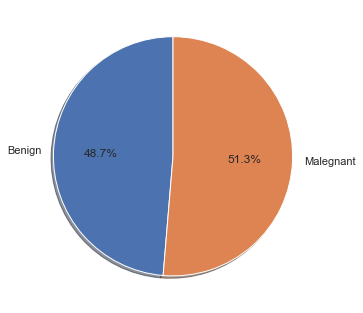

In [13]:
#Make a pie chart of 'Condition' values Condition: 0=Benign, 1=Malegnant
def condition_pie(data):
    cond = data['Condition'].value_counts()
    values = [cond[0], cond[1]]
    labels = 'Benign', 'Malegnant'
    plt.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    plt.show() 
    
condition_pie(df)

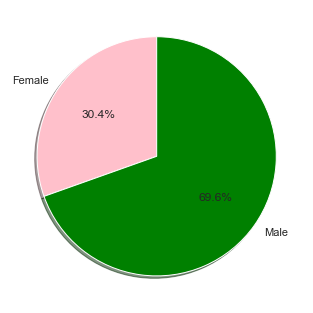

In [14]:
#Make a pie chart of 'Sex' values Sex: 0=Female, 1=Make
def genes_pie(data):
    cond = data['Sex'].value_counts()
    values = [cond[0], cond[1]]
    
    labels = 'Female', 'Male'
    colors = 'pink', 'green'
    plt.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
    plt.show() 
    
genes_pie(df)

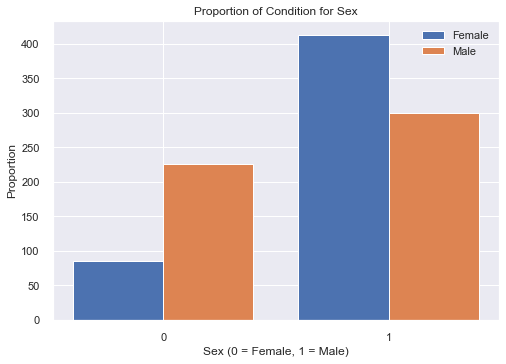

The proportion of Malignant for Sex:
Female: 42.97%
Male: 57.03%


In [15]:
#Bar chart of the proportion of condition vs sex
data = df['Sex'].groupby(df['Condition']).value_counts()

x1 = data[0][0], data[0][1]
x2 = data[1][0], data[1][1]
x_axis = np.arange(len(x1))

plt.bar(x_axis -0.2, x1 ,width=0.4, label = 'Female')
plt.bar(x_axis +0.2, x2, width=0.4, label = 'Male')
plt.title('Proportion of Condition for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Proportion')
plt.xticks(x_axis, [0, 1])
plt.legend()
plt.show()

# Show the percentage of Malignant for Sex
# female_malignant vs. Malignant
female_malignant = df[df['Sex']==0]['Condition'].sum()/df[df['Condition']==1]['Condition'].count()
# male_malignant vs. Malignant
male_malignant = df[df['Sex']==1]['Condition'].sum()/df[df['Condition']==1]['Condition'].count()

print('The proportion of Malignant for Sex:')
print(f'Female: {female_malignant:.2%}')
print(f'Male: {male_malignant:.2%}')

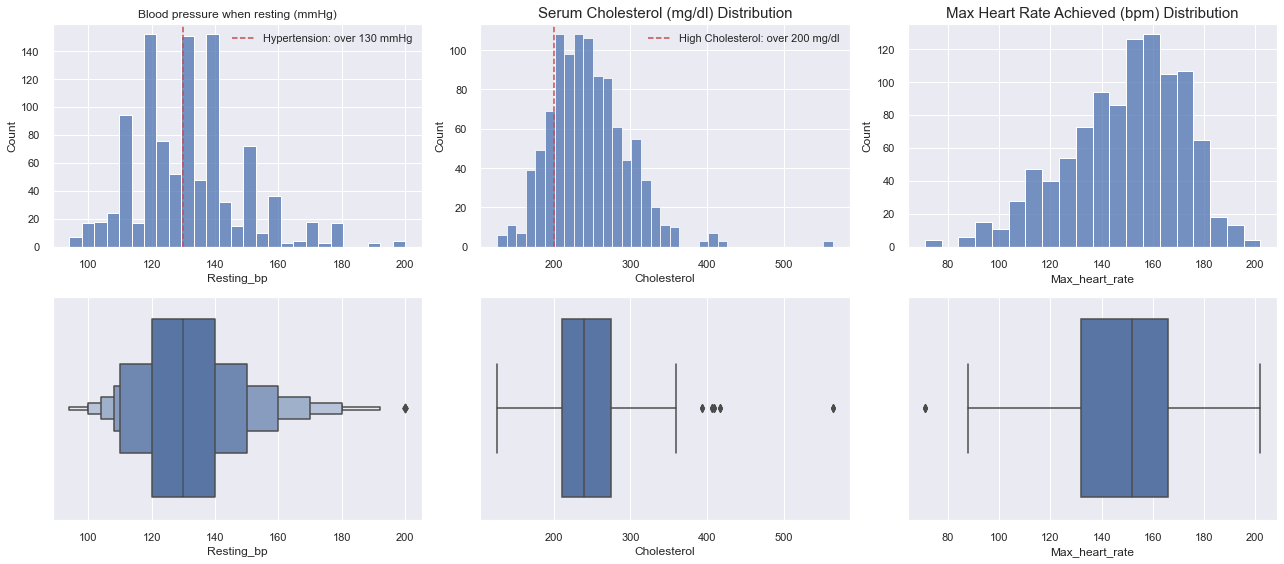

In [17]:
def risk_factors(data):
    fig = plt.figure(figsize=(18, 8))
    
    # Resting blood pressure
    plt.subplot(2, 3, 1)
    sns.histplot(data['Resting_bp'])
    plt.title('Blood pressure when resting (mmHg)')
    plt.axvline(x=130, color='r', linestyle='--', label='Hypertension: over 130 mmHg')
    plt.legend()
    
    plt.subplot(2, 3, 4)
    sns.boxenplot(x=data['Resting_bp'], orient='h')
    
    # Serum cholesterol 
    plt.subplot(2, 3, 2)
    sns.histplot(data['Cholesterol'])
    plt.title('Serum Cholesterol (mg/dl) Distribution', fontsize=15)
    plt.axvline(x=200, color='r', linestyle='--', label='High Cholesterol: over 200 mg/dl')
    plt.legend()
    
    plt.subplot(2, 3, 5)
    sns.boxplot(x=data['Cholesterol'], orient='h')
  
    
    # Maximum heart rate
    plt.subplot(2, 3, 3)
    sns.histplot(data['Max_heart_rate'])
    plt.title('Max Heart Rate Achieved (bpm) Distribution', fontsize=15)
    
    plt.subplot(2, 3, 6)
    sns.boxplot(x=data['Max_heart_rate'], orient='h')

    plt.tight_layout()
    plt.show()

risk_factors(df)

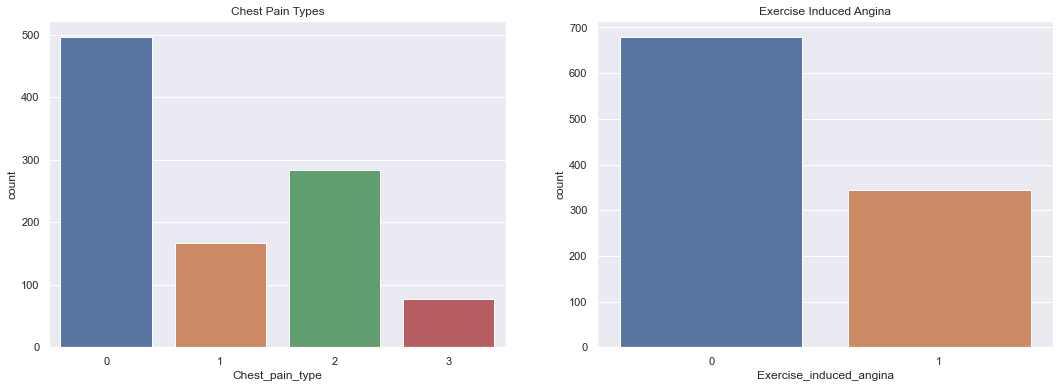

In [14]:
def symptoms_features(data):
    #Check chest pain
    plt.figure(figsize=(18, 6))
    
    # Chest pain types
    plt.subplot(1, 2, 1)
    sns.countplot(x='Chest_pain_type', data=data)
    plt.title('Chest Pain Types')

    
    # Exercise induced angina
    plt.subplot(1, 2, 2)
    sns.countplot(x='Exercise_induced_angina', data=data)
    plt.title('Exercise Induced Angina')

    
symptoms_features(df);

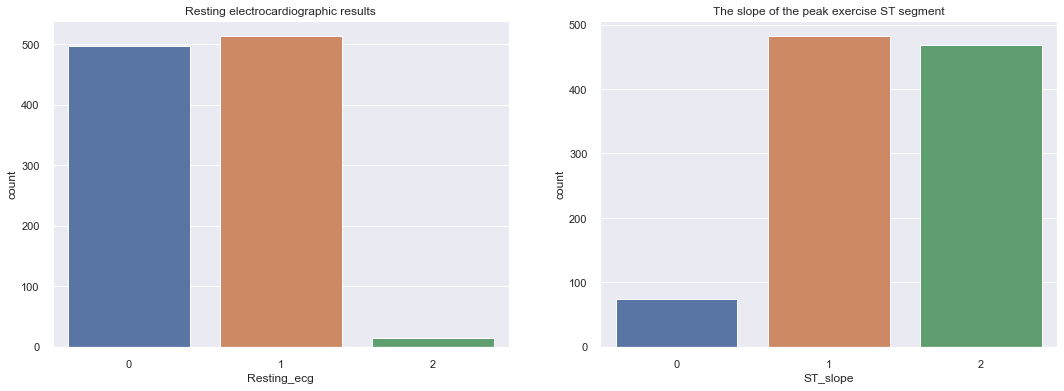

In [18]:
def heart_functions(data):
    #Resting ECG and ST slop bar chart
    
    plt.figure(figsize=(18, 6))

    # Resting_ecg
    plt.subplot(1, 2, 1)
    sns.countplot(x='Resting_ecg', data=data)
    plt.title('Resting electrocardiographic results')

    # ST_slope
    plt.subplot(1, 2, 2)
    sns.countplot(x='ST_slope', data=data)
    plt.title('The slope of the peak exercise ST segment')
    plt.show()
    

heart_functions(df);

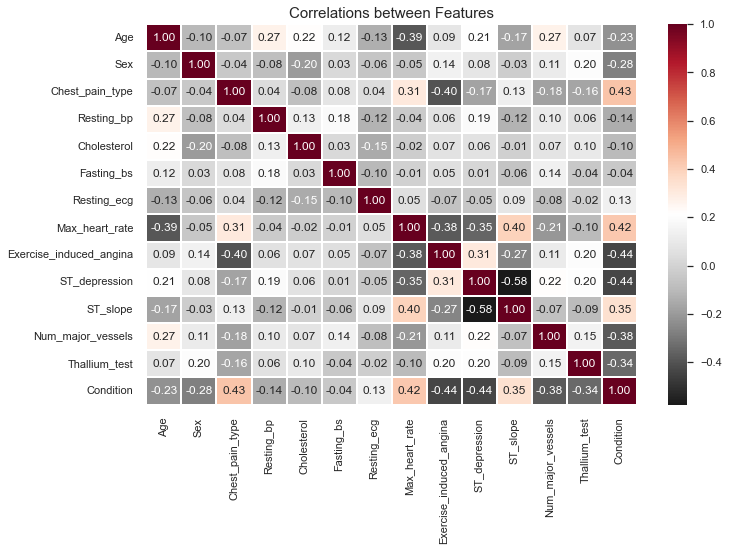

In [19]:
def corr_heatmap(data):
    #Correlation Heat map of features
    plt.figure(figsize=(11, 7))
    sns.heatmap(data.corr(), annot=True, linewidth=0.2, 
                fmt='.2f', cmap='RdGy_r')
    plt.title('Correlations between Features', fontsize=15)
    plt.show()
    
    
corr_heatmap(df);

In [20]:

# --- Reading Dataset ---
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Age,Sex,Chest_pain_type,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Num_major_vessels,Thallium_test,Condition
52,1,0,125,212,0,1,168,0,1.000000,2,2,3,0
53,1,0,140,203,1,0,155,1,3.100000,0,0,3,0
70,1,0,145,174,0,1,125,1,2.600000,0,0,3,0
61,1,0,148,203,0,1,161,0,0.000000,2,1,3,0
62,0,0,138,294,1,1,106,0,1.900000,1,3,2,0


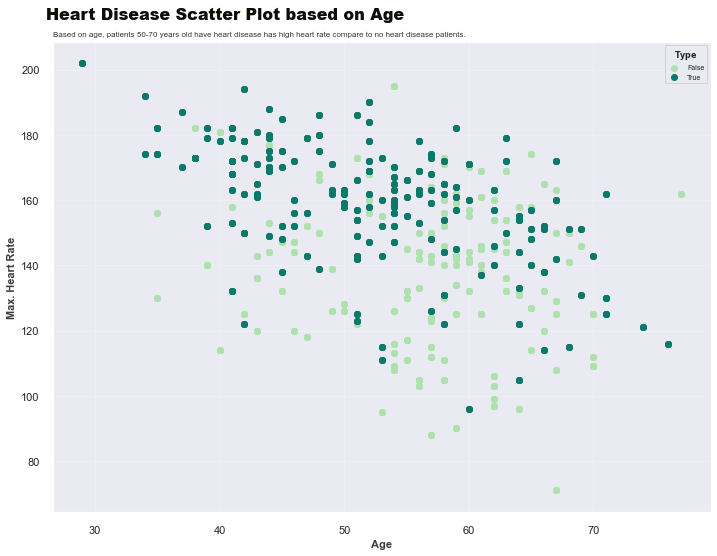

In [21]:
# Scatter Settings
plt.figure(figsize=(10, 8))

plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color='#100C07')
plt.title('Based on age, patients 50-70 years old have heart disease has high heart rate compare to no heart disease patients.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color='#3E3B39')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.Age[df.Condition==0], y=df.Max_heart_rate[(df.Condition==0)], c='#AFE1AF')
plt.scatter(x=df.Age[df.Condition==1], y=df.Max_heart_rate[(df.Condition==1)], c='#097969')

# Scatter plot settings
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif', color='#3E3B39')
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif', color='#3E3B39')
plt.ticklabel_format(axis="y", style='plain')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

# one hot encoding

In [22]:
cp = pd.get_dummies(df['Chest_pain_type'], prefix='cp')
thal = pd.get_dummies(df['Thallium_test'], prefix='thal')
slope = pd.get_dummies(df['ST_slope'], prefix='slope')

frames = [df, cp, thal, slope]
df = pd.concat(frames, axis=1)

In [28]:
# --- Display New Data Frame ---
df.head()

,Age,Sex,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,Num_major_vessels,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [23]:
# --- Drop Unnecessary Variables ---
df = df.drop(columns = ['Chest_pain_type', 'Thallium_test', 'ST_slope'])

In [27]:
df.head()

,Age,Sex,Resting_bp,Cholesterol,Fasting_bs,Resting_ecg,Max_heart_rate,Exercise_induced_angina,ST_depression,Num_major_vessels,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [24]:
x = df.drop(['Condition'], axis=1)
y = df['Condition']

In [25]:
x = MinMaxScaler().fit_transform(x)

# Machine Learning Algorithms

# --- Applying Logistic Regression ---

In [26]:
# Splitting Dataset into 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [27]:
LRclassification = LogisticRegression(max_iter=1000, random_state=1, solver='liblinear', penalty='l1')
LRclassification.fit(x_train, y_train)
y_preditLR = LRclassification.predict(x_test)

In [28]:
LRacc = accuracy_score(y_preditLR, y_test)

In [29]:
print('Logictic Regression Accuracy: {:.2f}%'.format(LRacc*100))

Logictic Regression Accuracy: 83.90%


# K-Nearest Neighbour (KNN)

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_predknn = knn.predict(x_test)

In [31]:
knnacc = accuracy_score(y_predknn, y_test)
print('K-Nearest Neighbour Accuracy: {:.2f}%'.format(knnacc*100))

K-Nearest Neighbour Accuracy: 95.61%


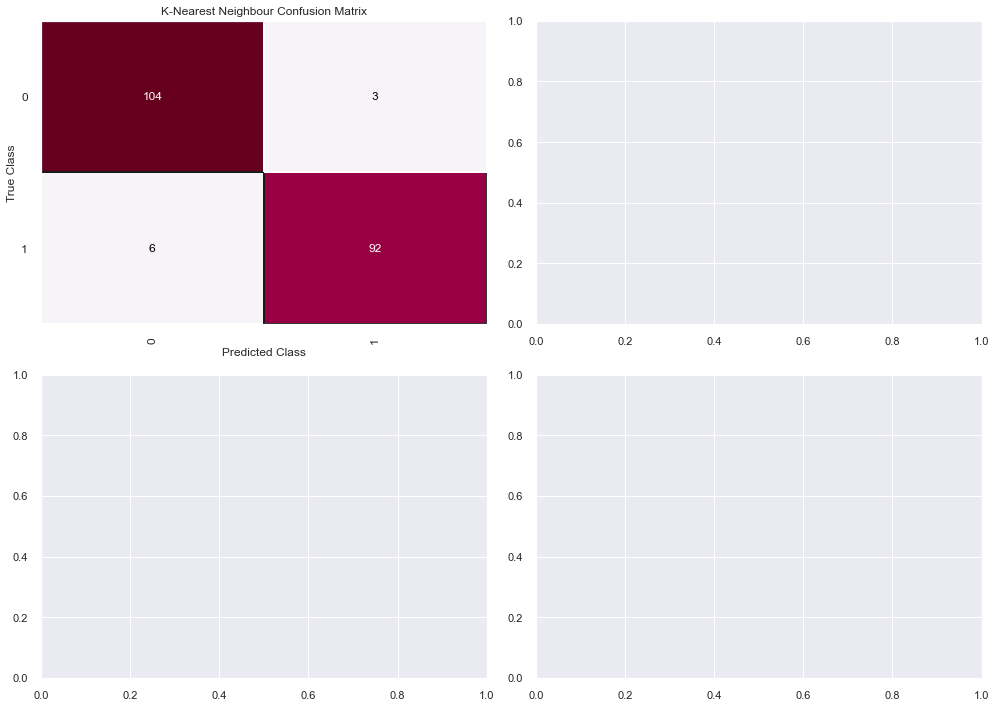

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14, 10))
# --- KNN Confusion Matrix ---
knnmatrix = ConfusionMatrix(knn, ax=ax1, cmap='PuRd',
                            title='K-Nearest Neighbour Confusion Matrix')
knnmatrix.fit(x_train, y_train)
knnmatrix.score(x_test, y_test)
knnmatrix.finalize()

# Support vector Machine (SVM)

In [52]:
svm = SVC(kernel='linear', max_iter=1000, C=10, probability=True)
svm.fit(x_train, y_train)

y_predsvm = svm.predict(x_test)

C:\Users\irfan\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning:

Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



In [55]:
svmacc = accuracy_score(y_predsvm, y_test)
print('SVM Accuracy: {:.2f}%'.format(svmacc*100))

SVM Accuracy: 83.90%


# Random Forest

In [57]:
rf = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

rf.fit(x_train, y_train)
y_predrf = rf.predict(x_test)

In [58]:
rfacc = accuracy_score(y_predrf, y_test)
print('Random Forest Accuracy: {:.2f}%'.format(rfacc*100))

Random Forest Accuracy: 88.78%
